After the installation is complete, please re-run the previous cell to continue.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# Load the dataset
# Make sure the CSV file is in the same directory as your notebook, or provide the full path.
df = pd.read_csv('/content/aqi_data.csv')

# Display the first few rows of the dataframe
print("First 5 rows of the dataset:")
print(df)

# Get a summary of the dataframe, including data types and non-null values
print("\nDataFrame Info:")
df.info()

First 5 rows of the dataset:
Empty DataFrame
Columns: [State, City, Date, PM2.5, PM10, NO2, SO2, CO, O3, AQI]
Index: []

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   State   0 non-null      object
 1   City    0 non-null      object
 2   Date    0 non-null      object
 3   PM2.5   0 non-null      object
 4   PM10    0 non-null      object
 5   NO2     0 non-null      object
 6   SO2     0 non-null      object
 7   CO      0 non-null      object
 8   O3      0 non-null      object
 9   AQI     0 non-null      object
dtypes: object(10)
memory usage: 132.0+ bytes


In [ ]:
# Clean up column names by removing special characters and spaces
df.columns = df.columns.str.replace(r'\s*\(.*\)\s*', '', regex=True).str.strip()

# Convert 'Date' to datetime objects, trying multiple formats
# Since 'Date' is already the index and is in datetime format, this step is no longer needed.
# df_city['Date'] = pd.to_datetime(df_city['Date'], errors='coerce')

# Drop rows where the timestamp could not be parsed - no longer needed as Date is already datetime index
# df_city.dropna(subset=['Date'], inplace=True)

# Set the timestamp as the index - already done in the previous cell
# df_city.set_index('Date', inplace=True)

# Identify numeric columns for imputation
numeric_cols = df.select_dtypes(include=np.number).columns

# Handle missing values by forward-filling them.
# This is a reasonable approach for time series data, as it assumes the most recent value is a good estimate.
for col in numeric_cols:
    df[col].fillna(method='ffill', inplace=True)
    df[col].fillna(method='bfill', inplace=True) # Also backfill to handle leading NaNs

print("\nDataset after cleaning and preprocessing:")
print(df)
df.info()


Dataset after cleaning and preprocessing:
Empty DataFrame
Columns: [State, City, Date, PM2.5, PM10, NO2, SO2, CO, O3, AQI]
Index: []
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   State   0 non-null      object
 1   City    0 non-null      object
 2   Date    0 non-null      object
 3   PM2.5   0 non-null      object
 4   PM10    0 non-null      object
 5   NO2     0 non-null      object
 6   SO2     0 non-null      object
 7   CO      0 non-null      object
 8   O3      0 non-null      object
 9   AQI     0 non-null      object
dtypes: object(10)
memory usage: 132.0+ bytes


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the dataset
df = pd.read_csv('/content/across West Bengal cities 2019 to 2024 (1).csv')

# --- Data Cleaning and Preprocessing ---

# Convert 'Timestamp' to datetime objects
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Set Timestamp as the index
df.set_index('Timestamp', inplace=True)

# Remove the 'O Xylene (µg/m³)' column
try:
    df.drop('O Xylene (µg/m³)', axis=1, inplace=True)
    print("Column 'O Xylene (µg/m³)' has been removed.")
except KeyError:
    print("Column 'O Xylene (µg/m³)' not found.")

# Select one city for this example.
df_city = df[df['Location'] == 'Siliguri'].copy()

# Identify numeric columns for imputation
numeric_cols = df_city.select_dtypes(include=np.number).columns

# Imputation using an expanding mean
for col in numeric_cols:
    df_city[col] = df_city[col].fillna(df_city[col].expanding().mean())

# Display the first few rows of the cleaned data
print("\nCleaned Data Head:")
print(df_city)
print("\nData Info after cleaning:")
df_city.info()

Column 'O Xylene (µg/m³)' has been removed.

Cleaned Data Head:
            Location  PM2.5 (µg/m³)  PM10 (µg/m³)  NO (µg/m³)  NO2 (µg/m³)  \
Timestamp                                                                    
2019-01-01  Siliguri         117.08        171.65       21.60        57.78   
2019-01-02  Siliguri         125.84        201.19       27.02        66.34   
2019-01-03  Siliguri         168.57        261.00       28.38        72.08   
2019-01-04  Siliguri         143.95        237.01       29.80        71.51   
2019-01-05  Siliguri         119.60        205.20       28.27        67.72   
...              ...            ...           ...         ...          ...   
2024-12-27  Siliguri          53.99        116.80       24.25        26.70   
2024-12-28  Siliguri          57.35        114.97       30.62        28.56   
2024-12-29  Siliguri          54.91        130.18       39.74        27.29   
2024-12-30  Siliguri          88.94        154.77       23.98        25.24   


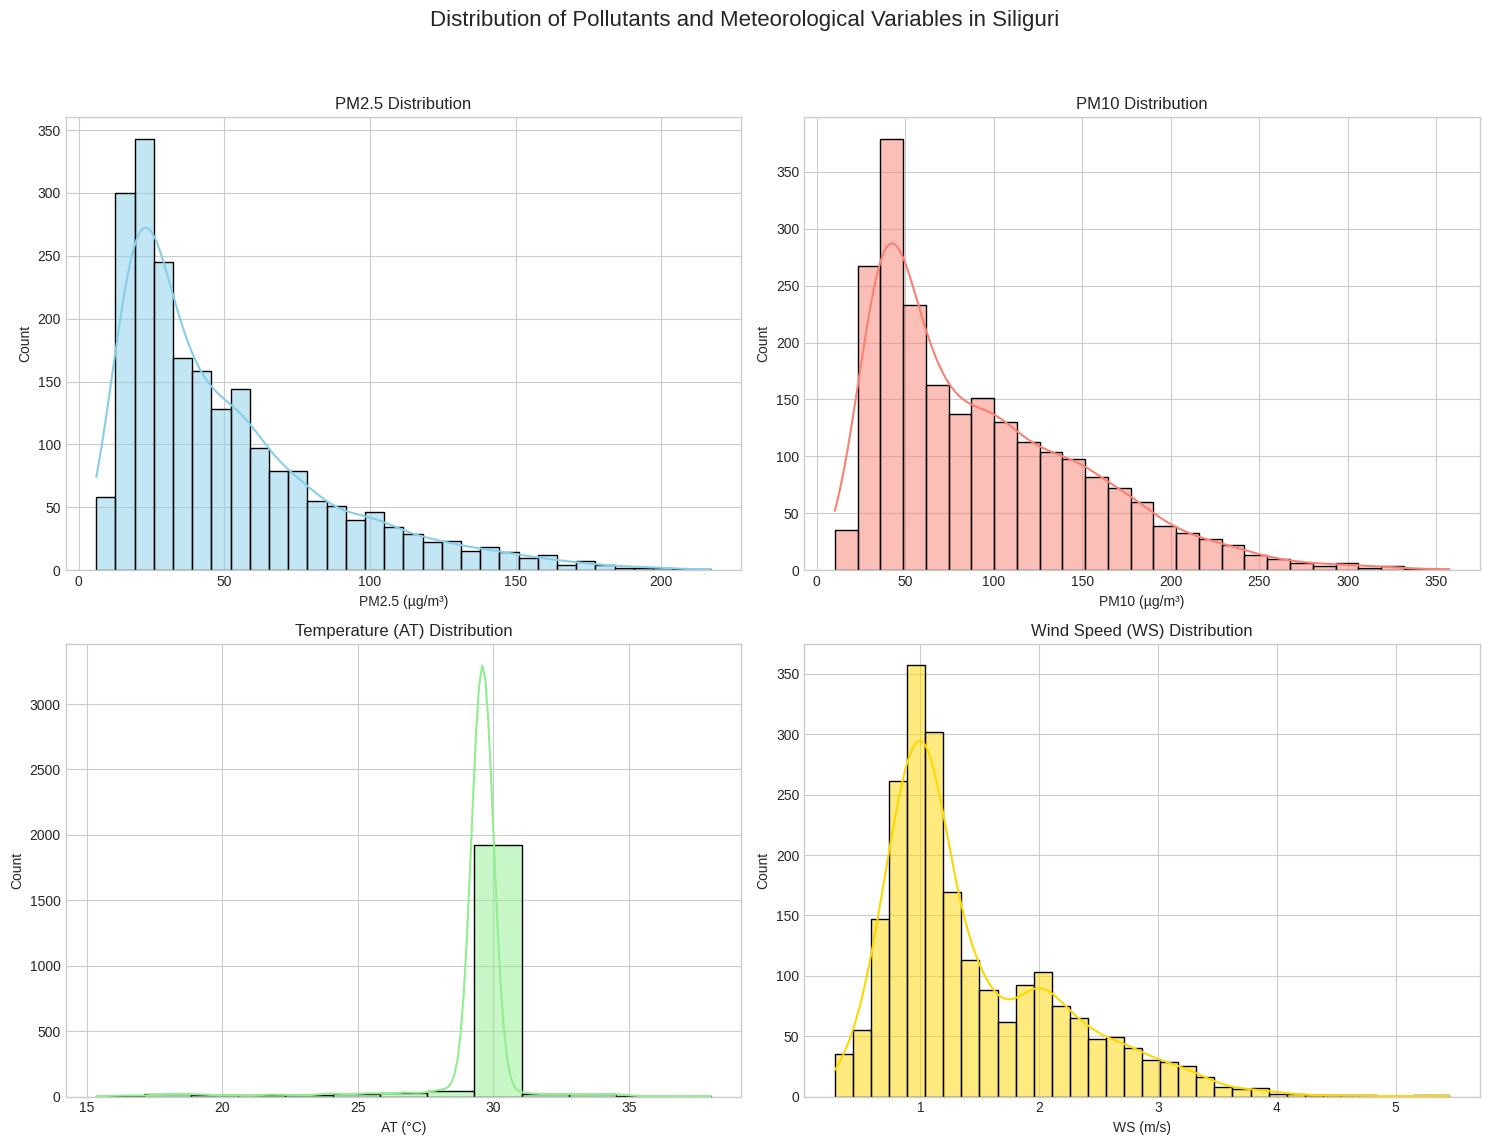

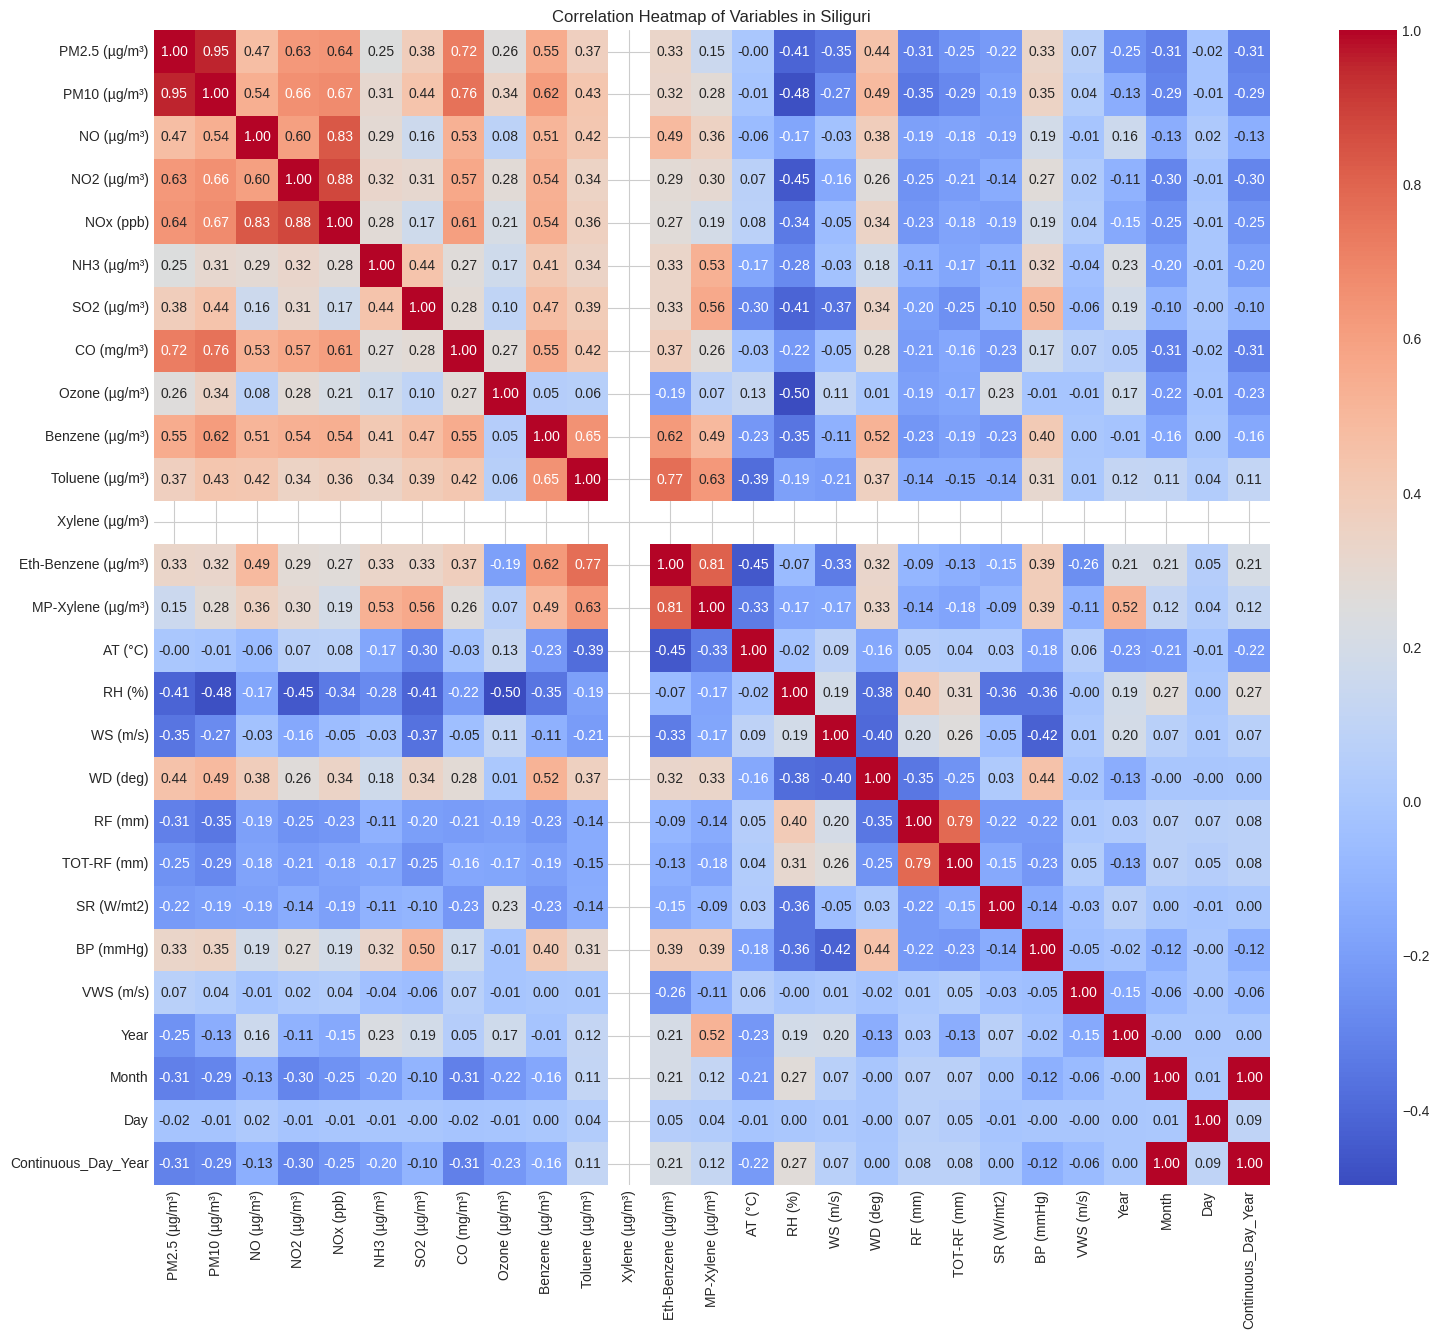

In [ ]:
# --- Exploratory Data Analysis (EDA) ---

# Plotting histograms for key pollutants and meteorological data
plt.style.use('seaborn-v0_8-whitegrid')
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))
fig.suptitle('Distribution of Pollutants and Meteorological Variables in Siliguri', fontsize=16)

sns.histplot(df_city['PM2.5 (µg/m³)'], kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('PM2.5 Distribution')

sns.histplot(df_city['PM10 (µg/m³)'], kde=True, ax=axes[0, 1], color='salmon')
axes[0, 1].set_title('PM10 Distribution')

sns.histplot(df_city['AT (°C)'], kde=True, ax=axes[1, 0], color='lightgreen')
axes[1, 0].set_title('Temperature (AT) Distribution')

sns.histplot(df_city['WS (m/s)'], kde=True, ax=axes[1, 1], color='gold')
axes[1, 1].set_title('Wind Speed (WS) Distribution')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Correlation Heatmap
plt.figure(figsize=(18, 15))
# We re-run the numeric_cols selection to ensure the dropped column is not included
numeric_cols = df_city.select_dtypes(include=np.number).columns
sns.heatmap(df_city[numeric_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Variables in Siliguri')
plt.show()

Dropping columns with more than 50% missing values: ['Xylene (µg/m³)', 'Eth-Benzene (µg/m³)']

Model Evaluation on Test Set (RMSE for each pollutant):
  - PM2.5 (µg/m³): 9.80
  - PM10 (µg/m³): 19.40
  - NO (µg/m³): 7.84
  - NO2 (µg/m³): 8.94
  - NOx (ppb): 12.92
  - NH3 (µg/m³): 10.01
  - SO2 (µg/m³): 2.49
  - CO (mg/m³): 0.12
  - Ozone (µg/m³): 7.95
  - Benzene (µg/m³): 2.77
  - Toluene (µg/m³): 2.97
  - MP-Xylene (µg/m³): 1.30

--- Generating Accuracy Plots ---


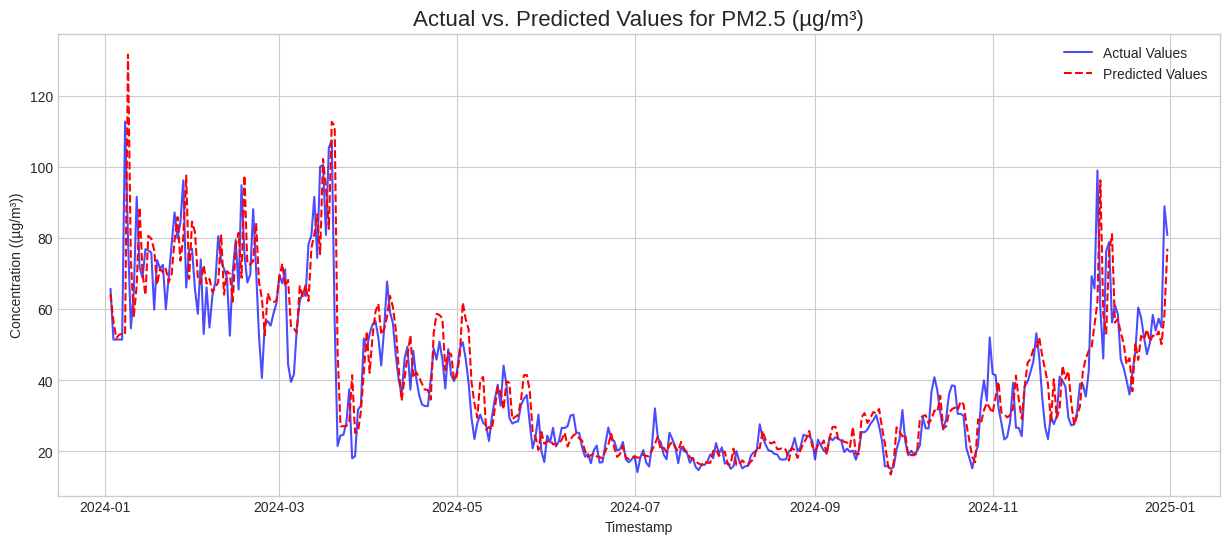

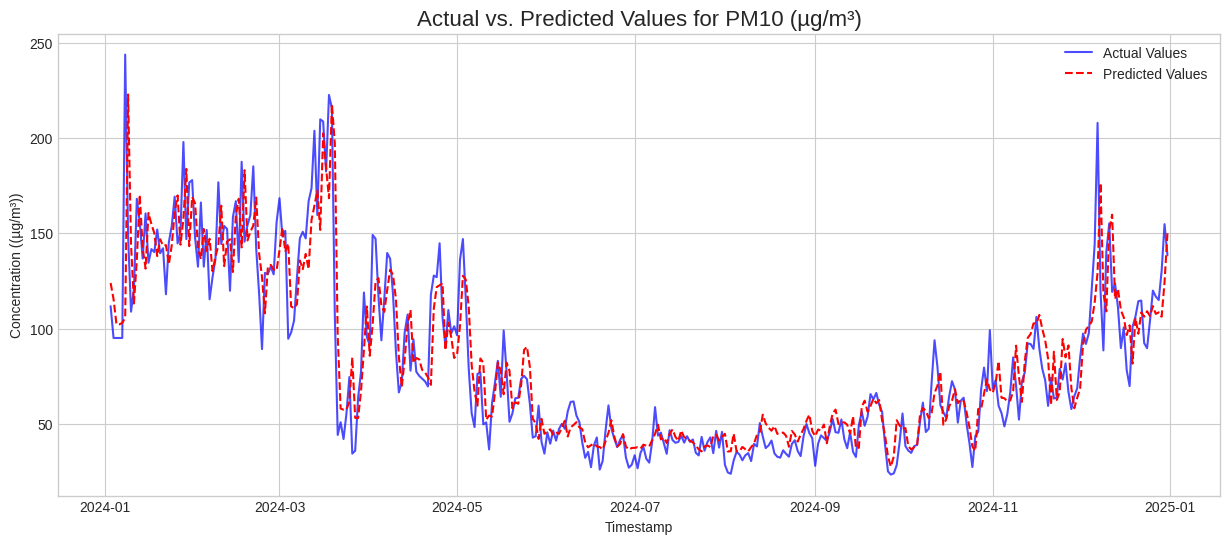

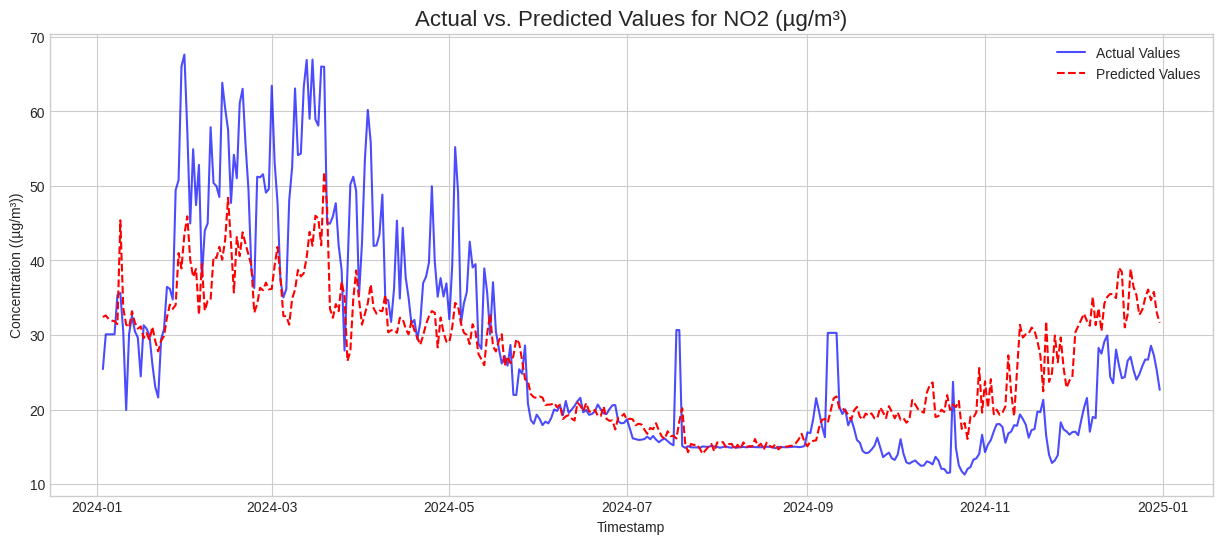

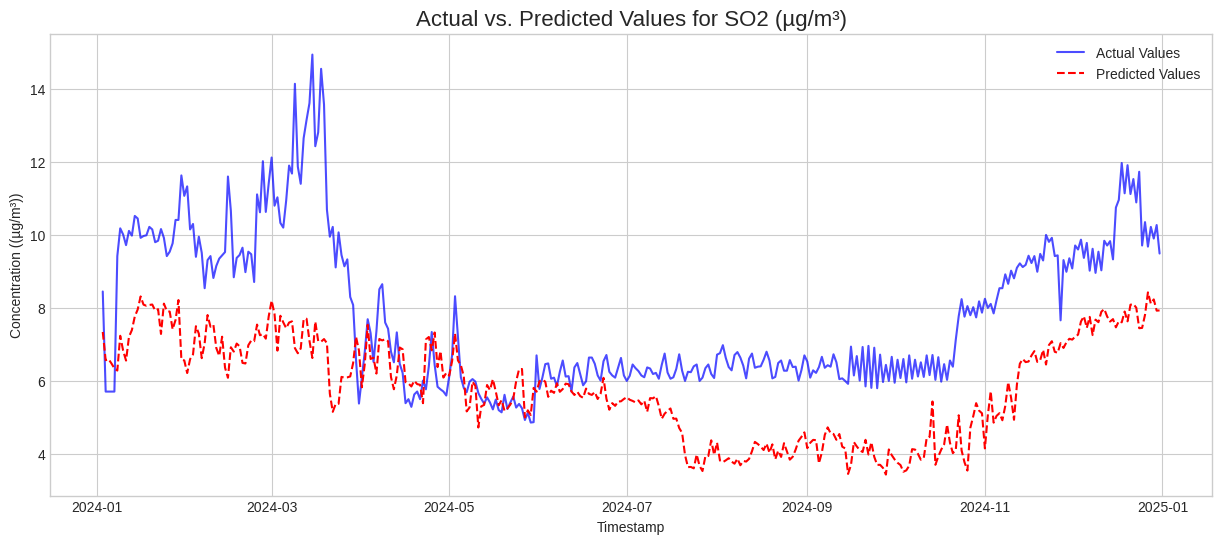


--- Predicted Pollutant Levels for the next 7 days ---
            Predicted_PM2.5  Predicted_PM10  Predicted_NO  Predicted_NO2  \
2025-01-01        50.936774      106.631401     25.190929      33.363112   
2025-01-02        52.591679      111.789924     27.250358      34.925182   
2025-01-03        52.192889      107.689634     25.872588      36.092635   
2025-01-04        53.728313      108.512478     24.081510      34.671507   
2025-01-05        50.139852      106.209266     26.915989      35.782730   
2025-01-06        58.482892      124.347939     25.156339      32.978722   
2025-01-07        77.001718      150.038779     22.952611      31.650355   

            Predicted_NOx  Predicted_NH3  Predicted_SO2  Predicted_CO  \
2025-01-01      48.319271      41.557654       7.452329      0.734912   
2025-01-02      49.789461      44.417798       7.811380      0.767639   
2025-01-03      46.667231      45.458593       8.426260      0.769248   
2025-01-04      45.398023      43.049172   

In [ ]:
# --- Machine Learning Model ---

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Assuming 'df_city' is your preprocessed DataFrame from the previous steps

# Feature Engineering for Time Series
def create_lag_features(df, target_cols, lag_days):
    df_lag = df.copy()
    for col in target_cols:
        if col in df_lag.columns: # Added check to ensure column exists
            for i in range(1, lag_days + 1):
                df_lag[f'{col}_lag_{i}'] = df_lag[col].shift(i)
    return df_lag

# --- Define Target Pollutants ---
target_pollutants = [
    'PM2.5 (µg/m³)', 'PM10 (µg/m³)', 'NO (µg/m³)', 'NO2 (µg/m³)', 'NOx (ppb)',
    'NH3 (µg/m³)', 'SO2 (µg/m³)', 'CO (mg/m³)', 'Ozone (µg/m³)', 'Benzene (µg/m³)',
    'Toluene (µg/m³)', 'Xylene (µg/m³)', 'Eth-Benzene (µg/m³)', 'MP-Xylene (µg/m³)'
]
target_pollutants_in_df = [col for col in target_pollutants if col in df_city.columns]

# --- MODIFICATION: Drop columns with a high percentage of missing values before creating lag features ---
# Calculate the percentage of missing values for each column
missing_percentage = df_city.isnull().sum() / len(df_city) * 100

# Define a threshold for dropping columns (e.g., 50% missing values)
missing_threshold = 50

# Get the list of columns to drop
cols_to_drop = missing_percentage[missing_percentage > missing_threshold].index.tolist()

print(f"Dropping columns with more than {missing_threshold}% missing values: {cols_to_drop}")
df_model = df_city.drop(columns=cols_to_drop)

# Update the list of target pollutants in the dataframe after dropping columns
target_pollutants_in_df = [col for col in target_pollutants_in_df if col not in cols_to_drop]


df_model = create_lag_features(df_model, target_pollutants_in_df, 7)

# Drop rows with NaN values created by the lag features
df_model.dropna(inplace=True)

# Define features (X) and targets (y)
features = [col for col in df_model.columns if col not in target_pollutants_in_df and col != 'Location']
X = df_model[features]
y = df_model[target_pollutants_in_df]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Initialize and train the RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

# --- Prediction and Evaluation ---

# Make predictions on the test set
y_pred = model.predict(X_test)

# Convert the predictions array back to a DataFrame for easier handling
y_pred_df = pd.DataFrame(y_pred, index=y_test.index, columns=y_test.columns)

# --- 1. NUMERICAL ACCURACY (RMSE) ---
# This part calculates the error for each pollutant. Lower is better.
print("\nModel Evaluation on Test Set (RMSE for each pollutant):")
for pollutant in y_test.columns:
    rmse = np.sqrt(mean_squared_error(y_test[pollutant], y_pred_df[pollutant]))
    print(f"  - {pollutant}: {rmse:.2f}")


# --- 2. GRAPHICAL ACCURACY REPRESENTATION ---
# We will plot the actual vs. predicted values for a few key pollutants
print("\n--- Generating Accuracy Plots ---")
pollutants_to_plot = ['PM2.5 (µg/m³)', 'PM10 (µg/m³)', 'NO2 (µg/m³)', 'SO2 (µg/m³)']

for pollutant in pollutants_to_plot:
    if pollutant in y_test.columns:
        plt.figure(figsize=(15, 6))

        # Plotting the actual values from the test set
        plt.plot(y_test.index, y_test[pollutant], label='Actual Values', color='blue', alpha=0.7)

        # Plotting the model's predicted values
        plt.plot(y_pred_df.index, y_pred_df[pollutant], label='Predicted Values', color='red', linestyle='--')

        plt.title(f'Actual vs. Predicted Values for {pollutant}', fontsize=16)
        plt.xlabel('Timestamp')
        plt.ylabel(f'Concentration ({pollutant.split(" ")[1]})')
        plt.legend()
        plt.grid(True)
        plt.show()

# --- Predicting the next 7 days ---
# (This part remains the same)
last_7_days = X.tail(7)
future_predictions = model.predict(last_7_days)

print(f"\n--- Predicted Pollutant Levels for the next 7 days ---")
future_dates = pd.date_range(start=df_model.index[-1] + pd.Timedelta(days=1), periods=7)
predicted_columns = [f"Predicted_{col.split(' ')[0]}" for col in target_pollutants_in_df]
predictions_df = pd.DataFrame(future_predictions, index=future_dates, columns=predicted_columns)
print(predictions_df)